<a href="https://colab.research.google.com/github/panchambanerjee/practical_deep_learning_for_coders_fastai/blob/main/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 74.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.169794,0.011788,0.004060,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.046310,0.015775,0.006766,00:33


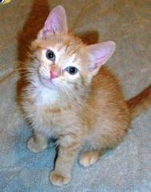

In [4]:

img = PILImage.create(image_cat())
img.to_thumb(192)

In [5]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [6]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


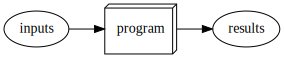

In [7]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

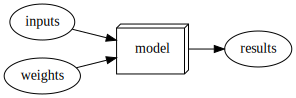

In [8]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

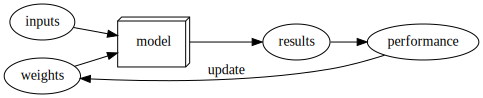

In [9]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')



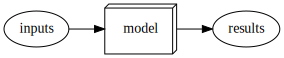

In [10]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

a trained model can be treated just like a regular computer program.

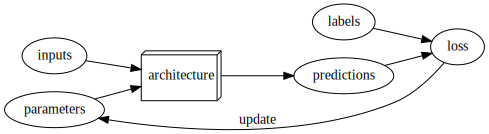

In [11]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

In [12]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.693789,3.109138,00:02


epoch,train_loss,valid_loss,time
0,2.030225,1.732837,00:02
1,1.709367,1.456784,00:02
2,1.489227,1.082190,00:02
3,1.324916,1.012579,00:02
4,1.174907,0.882329,00:02
5,1.048345,0.802569,00:02
6,0.947472,0.789329,00:02
7,0.871462,0.787009,00:02


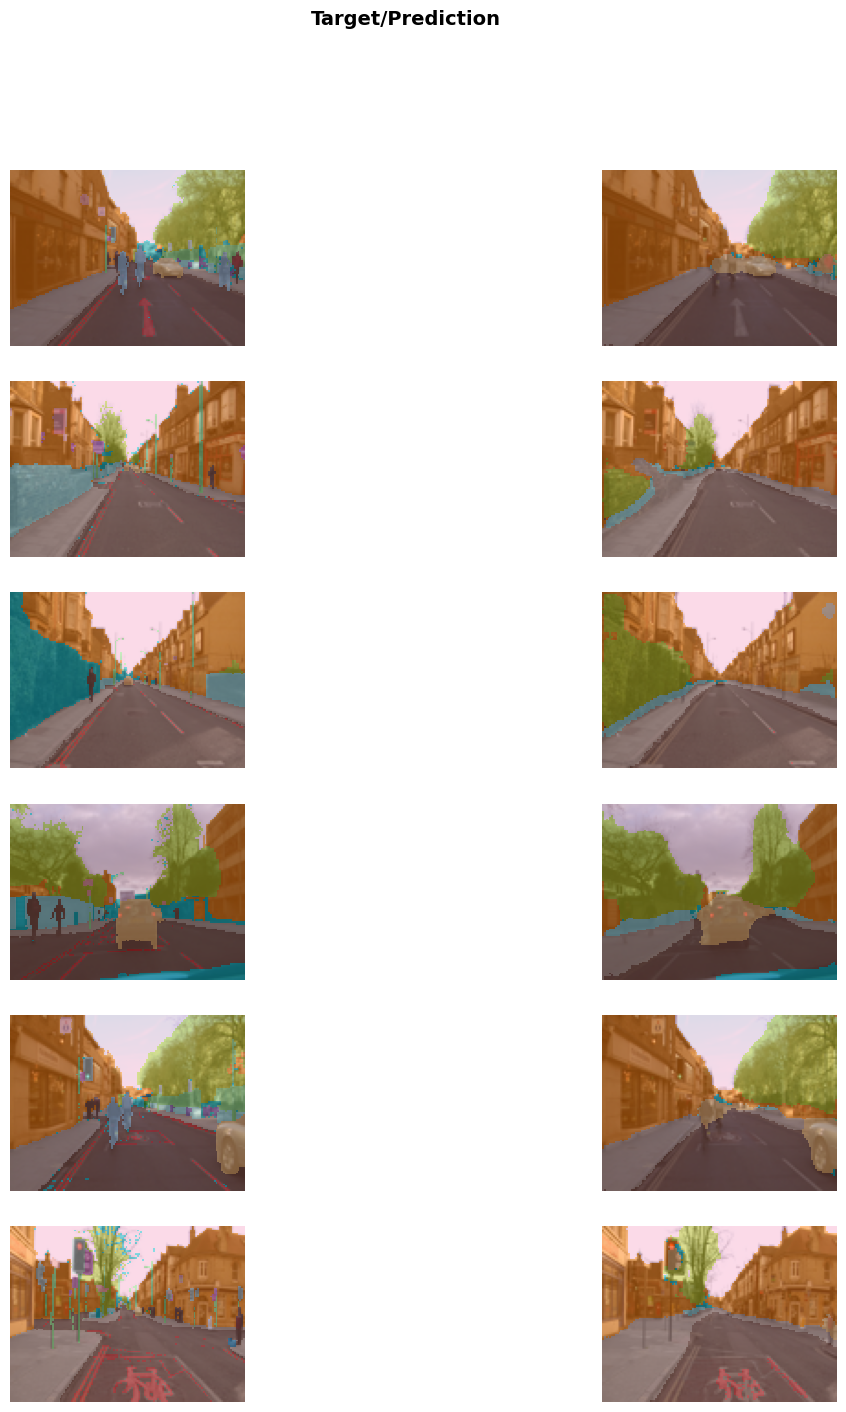

In [14]:

learn.show_results(max_n=6, figsize=(14,16))

In [19]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.476761,0.394222,0.825440,03:30


epoch,train_loss,valid_loss,accuracy,time
0,0.283632,0.243840,0.900800,07:23
1,0.238610,0.203075,0.920680,07:24


In [20]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0011, 0.9989]))

In [21]:
learn.predict("That movie was quite alright...")

('pos', tensor(1), tensor([0.3251, 0.6749]))

In [22]:
learn.predict("That movie was meh...")

('pos', tensor(1), tensor([0.3050, 0.6950]))

In [23]:

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [24]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.396666,0.374971,0.827856,00:04
1,0.352992,0.360713,0.829392,00:04
2,0.356773,0.350863,0.835534,00:04


In [25]:

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.516312,1.368459,00:00


epoch,train_loss,valid_loss,time
0,1.370656,1.308109,00:00
1,1.277575,1.124506,00:00
2,1.029202,0.829100,00:00
3,0.807219,0.698067,00:00
4,0.700336,0.665523,00:00
5,0.653792,0.655726,00:00
6,0.643521,0.651730,00:00
7,0.625799,0.649207,00:00
8,0.621930,0.648884,00:00
9,0.612444,0.648756,00:00


In [26]:

learn.show_results()

,userId,movieId,rating,rating_pred
0,14.0,3.0,4.0,3.634541
1,72.0,86.0,3.0,3.219956
2,33.0,19.0,3.0,2.652444
3,19.0,68.0,4.5,3.773459
4,28.0,37.0,3.5,2.895962
5,93.0,3.0,4.0,3.978241
6,14.0,74.0,4.0,3.437500
7,4.0,75.0,4.0,4.109104
8,72.0,99.0,3.5,3.226942
